# Topic Modeling

### abcnews_sample.csv

## import libraries and load dataset

In [1]:

# Loading data set using pandas.
import pandas as pd

file= "abcnews_sample.csv"
df = pd.read_csv(file)
df.head(10)

publish_date                                      headline_text
0      20050627        lawyer claims aust govt has abandoned corby
1      20051206     singapore tells spouses of patients hiv status
2      20141119         iron ore price slumps to new five year low
3      20060203      youth crime prevention schemes share in funds
4      20190521             harry triguboff speaks to the business
5      20140618           gbrmpa confirms axed directors positions
6      20110805               bega cheese denies listing will fail
7      20060401              us backs indonesia terrorism warnings
8      20140311  warren snowdon on aeu paying for cranitch camp...
9      20080805                     rba signals possible rates cut

## couple of texts

In [3]:
print(repr(df.iloc[2666]["headline_text"][0:400]))
print(repr(df.iloc[4726]["headline_text"][0:400]))

'arsenal facing make or break week'
'men xmas'


## We will split speech into sentences

In [4]:
import re
df["paragraphs"] = df["headline_text"].map(lambda text: re.split(r'\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stopwords

tfidf_text_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['headline_text'])
tfidf_text_vectors.shape

(20000, 4191)

## Make a data frame of sentences

In [6]:
paragraph_df = pd.DataFrame([{ "headline_text": paragraph, "publish_date": year }
               for paragraphs, year in zip(df["paragraphs"], df["publish_date"])
                  for paragraph in paragraphs if paragraph])
paragraph_df.head(10)

headline_text  publish_date
0        lawyer claims aust govt has abandoned corby      20050627
1     singapore tells spouses of patients hiv status      20051206
2         iron ore price slumps to new five year low      20141119
3      youth crime prevention schemes share in funds      20060203
4             harry triguboff speaks to the business      20190521
5           gbrmpa confirms axed directors positions      20140618
6               bega cheese denies listing will fail      20110805
7              us backs indonesia terrorism warnings      20060401
8  warren snowdon on aeu paying for cranitch camp...      20140311
9                     rba signals possible rates cut      20080805

## Get the TFIDF of the sentences DF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert spaCy stopwords to a list
stopwords_list = list(stopwords)

# Create the TfidfVectorizer
tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["headline_text"])

# Display the shape of the resulting TF-IDF matrix
tfidf_para_vectors.shape

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(20000, 4196)

## NMF

In [9]:
from sklearn.decomposition import NMF
nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

## Let’s look at our 10 topics

In [10]:
def display_topics(model, fe`atures, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]] * 100.0 / total)))

# Assuming you have already defined nmf_text_model and tfidf_text_vectorizer
feature_names = tfidf_text_vectorizer.get_feature_names_out()
display_topics(nmf_text_model, feature_names)


Topic 00
 interview (43.83)
 extended (3.20)
 brett (1.62)
 smith (1.27)
 michael (1.24)

Topic 01
 police (16.21)
 search (1.85)
 probe (1.61)
 missing (1.59)
 investigate (1.16)

Topic 02
 man (17.11)
 charged (4.71)
 missing (1.56)
 assault (1.49)
 jailed (1.36)

Topic 03
 new (14.47)
 laws (1.03)
 year (0.90)
 zealand (0.63)
 years (0.51)

Topic 04
 rural (12.76)
 news (12.50)
 national (8.59)
 abc (6.28)
 business (3.58)

Topic 05
 govt (3.41)
 council (2.18)
 health (1.37)
 nsw (1.25)
 plan (1.10)

Topic 06
 court (10.45)
 murder (3.94)
 accused (3.14)
 face (2.68)
 charges (1.92)

Topic 07
 says (13.85)
 government (1.01)
 pm (0.90)
 minister (0.60)
 chief (0.52)

Topic 08
 australia (7.44)
 day (2.78)
 south (1.86)
 test (1.38)
 world (1.10)

Topic 09
 crash (10.07)
 car (4.75)
 dies (4.64)
 killed (3.18)
 woman (2.46)


## Run same model

In [11]:
from sklearn.decomposition import NMF

# Assuming tfidf_para_vectors and tfidf_para_vectorizer are already defined
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 00
 interview (43.47)
 extended (3.20)
 brett (1.62)
 smith (1.27)
 michael (1.24)

Topic 01
 police (16.10)
 search (1.84)
 probe (1.61)
 missing (1.53)
 investigate (1.15)

Topic 02
 man (16.83)
 charged (4.63)
 missing (1.57)
 assault (1.49)
 jailed (1.35)

Topic 03
 new (14.50)
 laws (1.05)
 year (0.91)
 zealand (0.64)
 years (0.51)

Topic 04
 rural (12.92)
 news (12.71)
 national (8.74)
 abc (6.39)
 business (3.65)

Topic 05
 govt (3.09)
 council (1.94)
 fire (1.43)
 health (1.27)
 nsw (1.25)

Topic 06
 court (10.54)
 murder (3.93)
 accused (3.17)
 face (2.71)
 charges (1.95)

Topic 07
 says (13.71)
 government (1.03)
 pm (0.90)
 minister (0.58)
 chief (0.52)

Topic 08
 australia (7.47)
 day (2.80)
 south (1.85)
 test (1.41)
 world (1.12)

Topic 09
 crash (10.35)
 dies (4.71)
 car (4.59)
 killed (3.20)
 woman (2.44)


## How “BIG” is each topic?

In [26]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([ 5.53756861,  8.66460393, 11.20031772,  8.37540996,  7.00047338,
       19.24723894,  9.34651056,  7.95076497, 13.142109  ,  9.53500293])

## Topic sizes

In [13]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([ 5.63685559,  8.80928606, 11.52691264,  8.43924904,  7.08180879,
       20.13232019,  8.87039616,  6.53525071, 13.61047695,  9.35744388])

## Latent Dirichlet Allocation
### Start by cutting the paragraphs intowords:

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["headline_text"])
count_para_vectors.shape


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(20000, 4196)

## Run the LDA

In [16]:
from sklearn.decomposition import LatentDirichletAllocation
lda_para_model = LatentDirichletAllocation(n_components = 10,random_state=42)
W_lda_para_matrix =lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

In [17]:
def display_lda_topics(model, feature_names, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (feature_names[largest[i]], abs(words[largest[i]] * 100.0 / total)))

# Assuming you have already defined lda_para_model and count_para_vectorizer
feature_names_lda = count_para_vectorizer.get_feature_names_out()
display_lda_topics(lda_para_model, feature_names_lda)



Topic 00
 found (1.76)
 win (1.56)
 power (0.90)
 car (0.90)
 industry (0.88)

Topic 01
 man (1.15)
 ban (1.11)
 jail (1.09)
 people (0.92)
 centre (0.84)

Topic 02
 police (1.71)
 election (1.02)
 strike (0.83)
 kills (0.81)
 push (0.80)

Topic 03
 interview (2.31)
 police (1.39)
 death (1.28)
 guilty (1.07)
 bill (1.06)

Topic 04
 fire (2.61)
 govt (2.40)
 urged (1.36)
 country (0.96)
 state (0.90)

Topic 05
 new (1.89)
 council (1.52)
 nsw (1.41)
 funding (0.96)
 changes (0.90)

Topic 06
 court (3.05)
 murder (1.79)
 new (1.79)
 police (1.66)
 man (1.62)

Topic 07
 minister (0.83)
 act (0.82)
 year (0.78)
 leader (0.76)
 northern (0.59)

Topic 08
 crash (2.28)
 man (2.14)
 coast (1.52)
 police (1.19)
 dead (1.16)

Topic 09
 health (2.24)
 new (1.74)
 says (1.37)
 australia (0.97)
 final (0.92)


## Topic size

In [18]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([ 9.4290616 ,  9.49176811,  9.4305861 ,  9.60479834, 10.54583057,
       10.81791334, 10.43180296,  9.73187522, 10.24553077, 10.27083299])

## pyLDAvis

In [19]:
import pyLDAvis

# Assuming lda_para_model, count_para_vectors, and count_para_vectorizer are already defined

# Extract vocabulary and term frequencies from CountVectorizer
vocab = count_para_vectorizer.get_feature_names_out()
term_frequency = count_para_vectors.sum(axis=0).A1

# Get the topic-term distribution matrix from LDA model
topic_term_dists = lda_para_model.components_

# Get the document-topic distribution matrix from LDA model
doc_topic_dists = lda_para_model.transform(count_para_vectors)

# Get the document lengths
doc_lengths = count_para_vectors.sum(axis=1).A1

# Prepare the visualization
lda_display = pyLDAvis.prepare(
    topic_term_dists,
    doc_topic_dists,
    doc_lengths,
    vocab=vocab,
    term_frequency=term_frequency
)

# Display the visualization
pyLDAvis.display(lda_display)


## Let’s draw wordclouds for the 10topics

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML

display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1]  # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])

        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)

        plt.figure(figsize=(12, 12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")

        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

# Assuming you have already trained an NMF or LDA model and have the features (terms)
# Replace the following with your actual model and features
# wordcloud_topics(your_model, your_features)


C:\Users\shakkerar\AppData\Local\Temp\ipykernel_19152\88781572.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


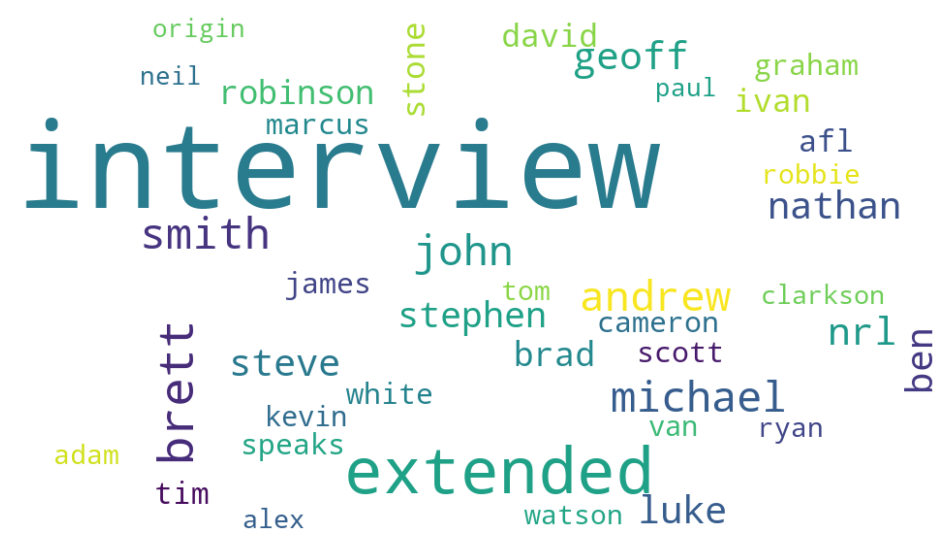

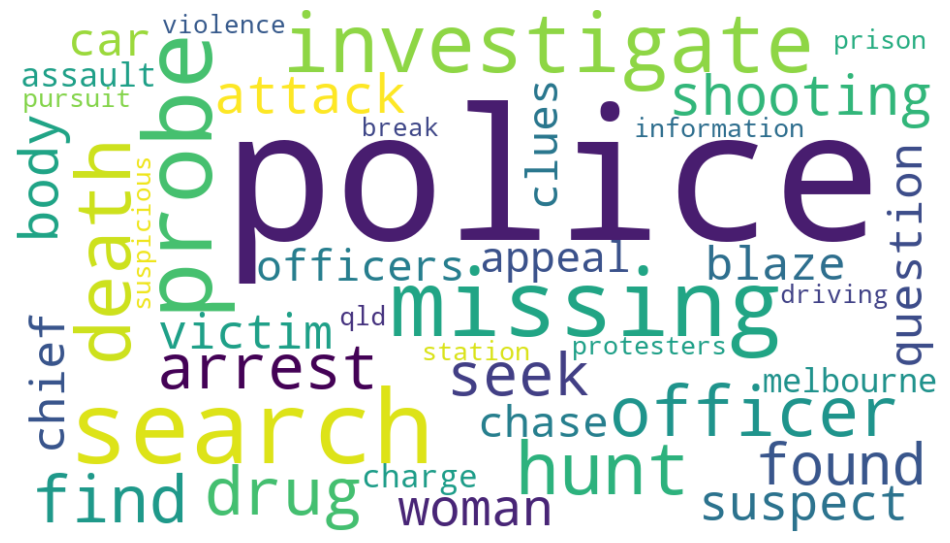

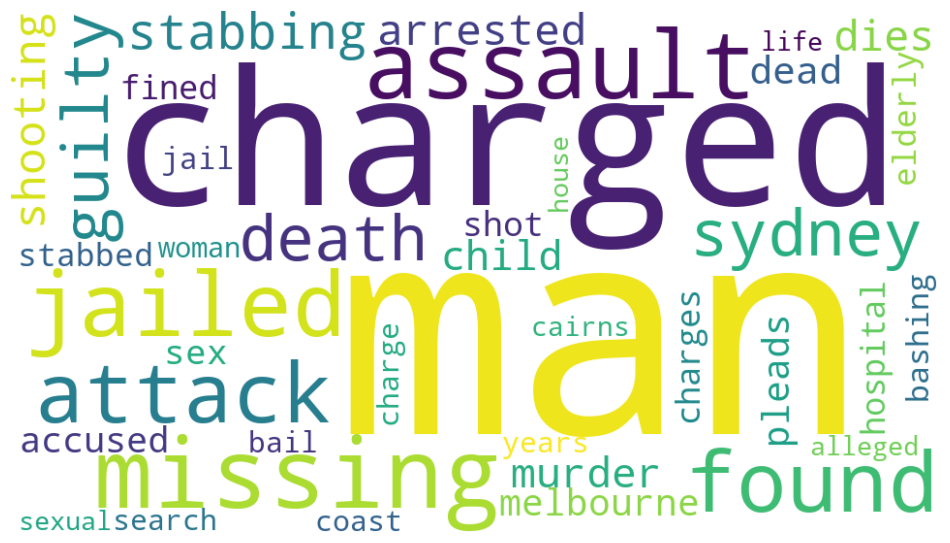

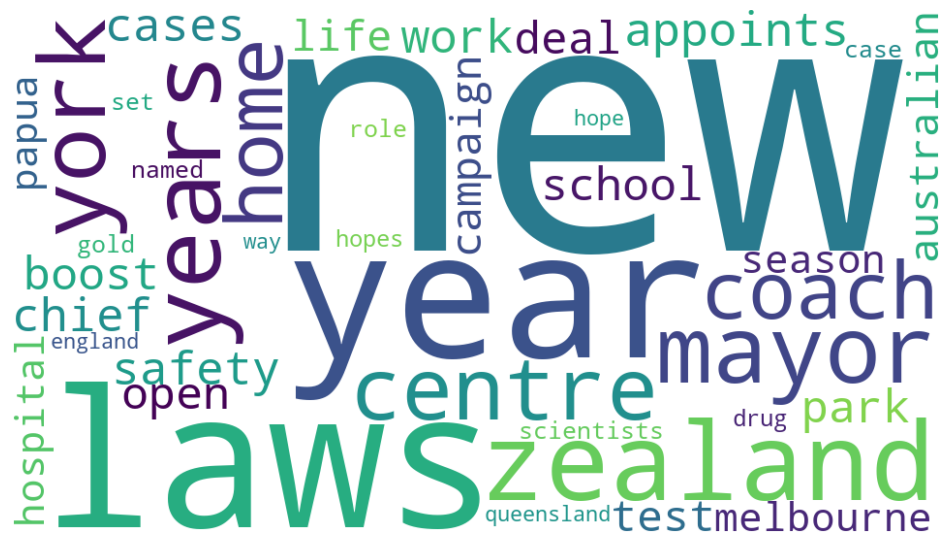

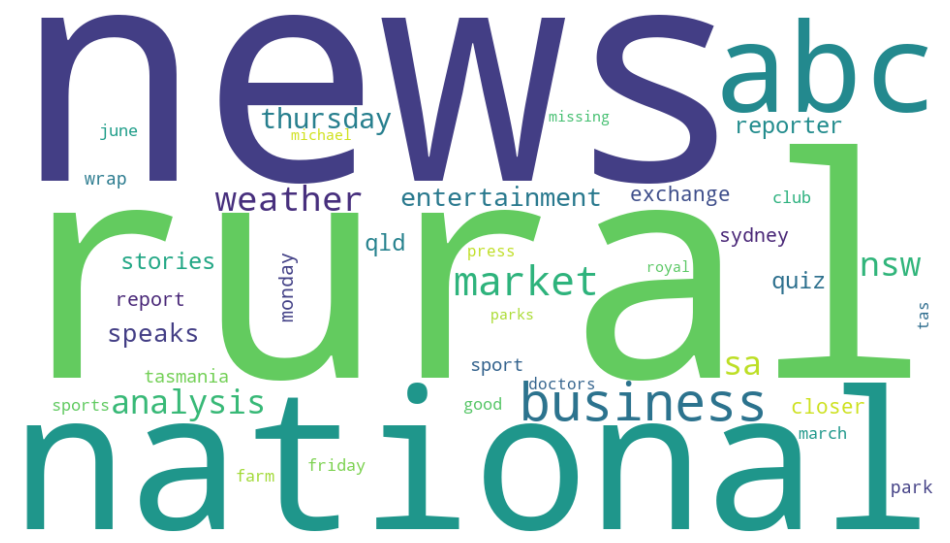

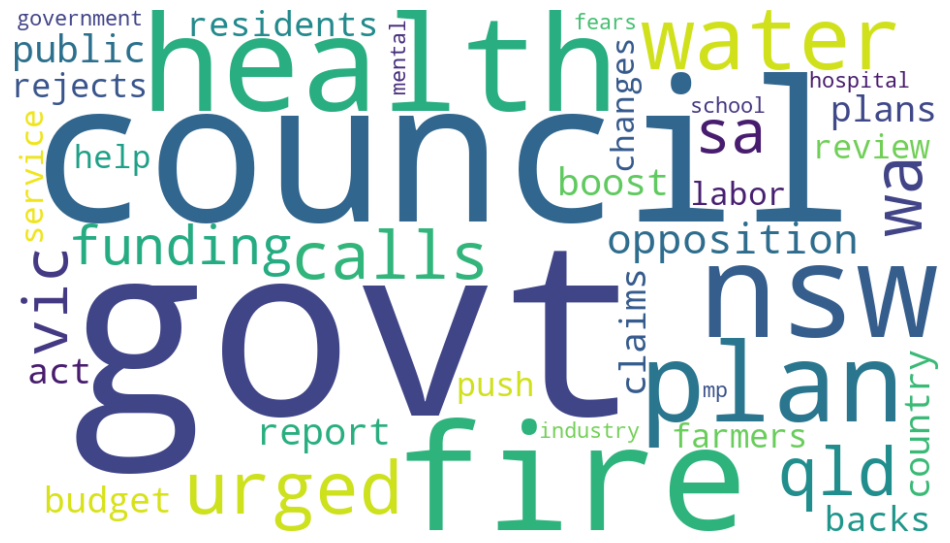

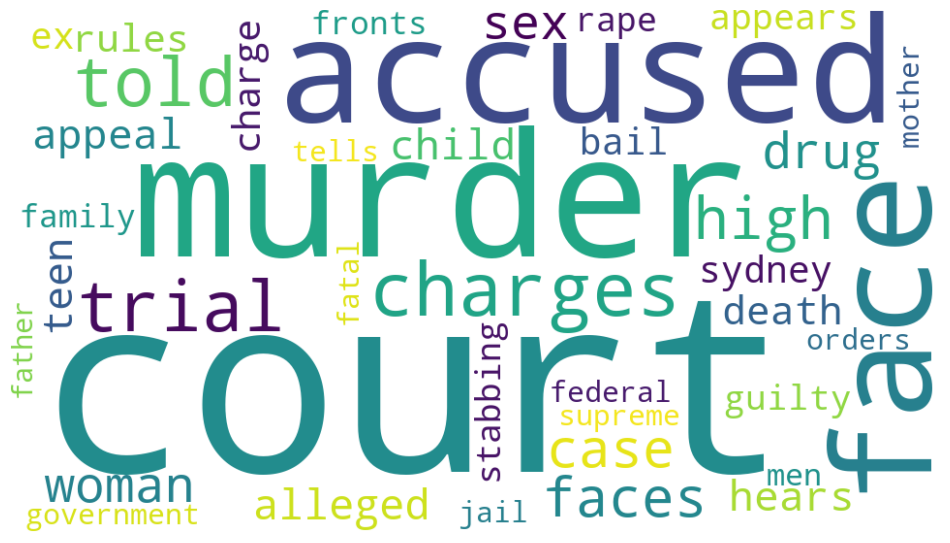

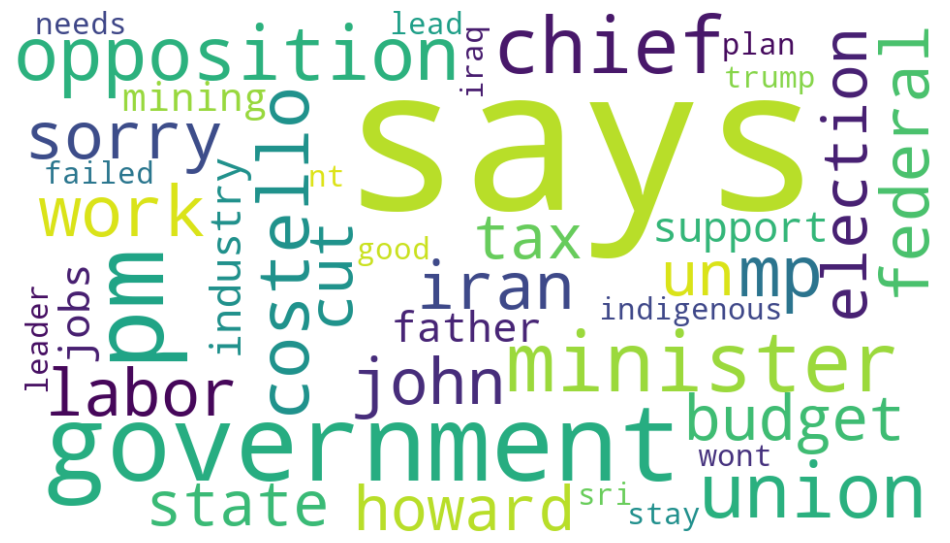

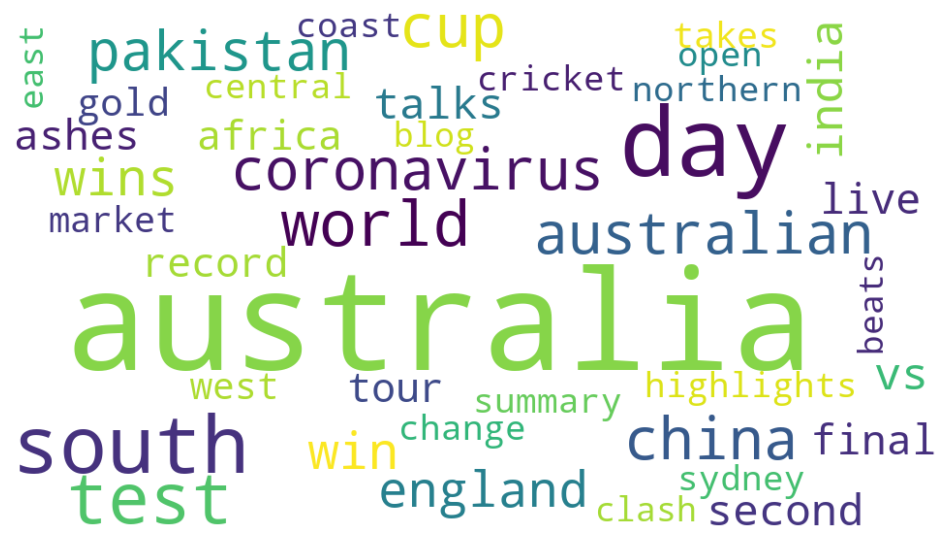

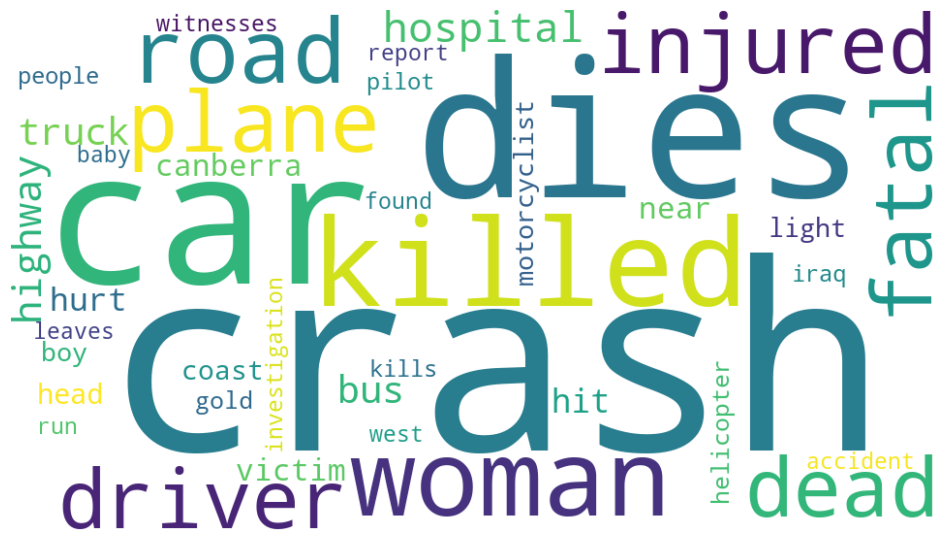

In [21]:
wordcloud_topics(nmf_para_model, count_para_vectorizer.get_feature_names_out())

## The LDA wordclouds

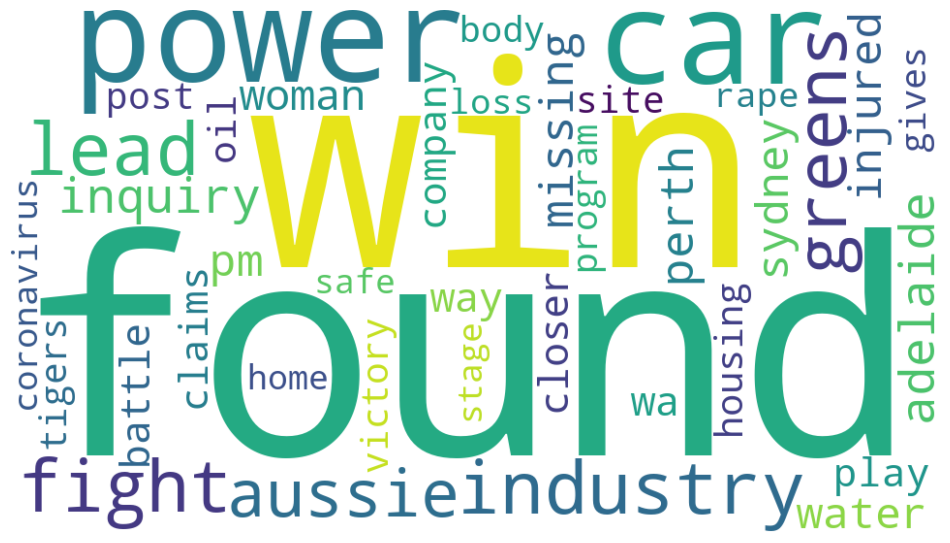

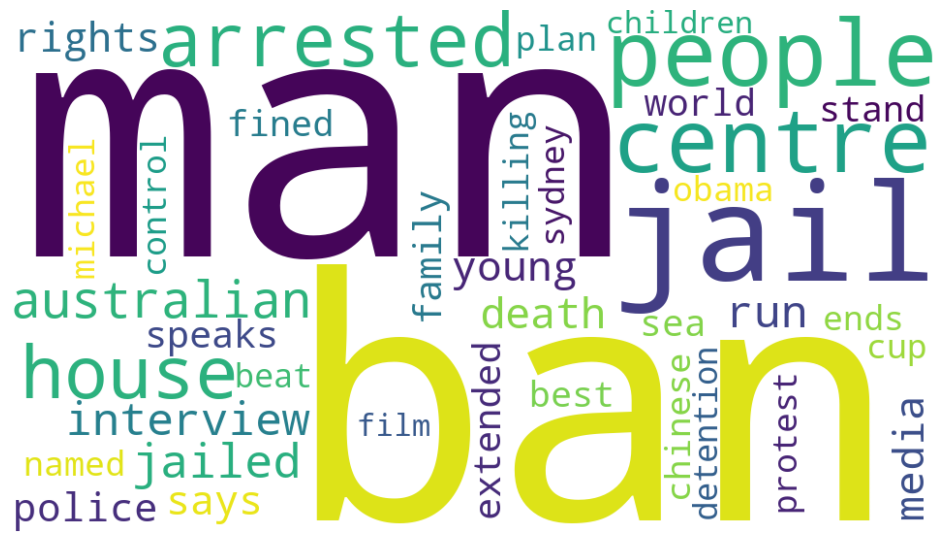

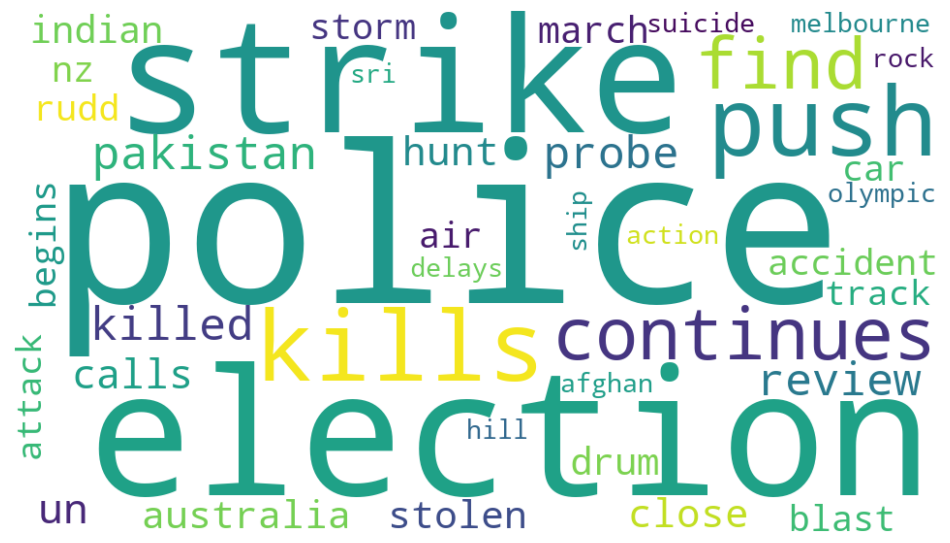

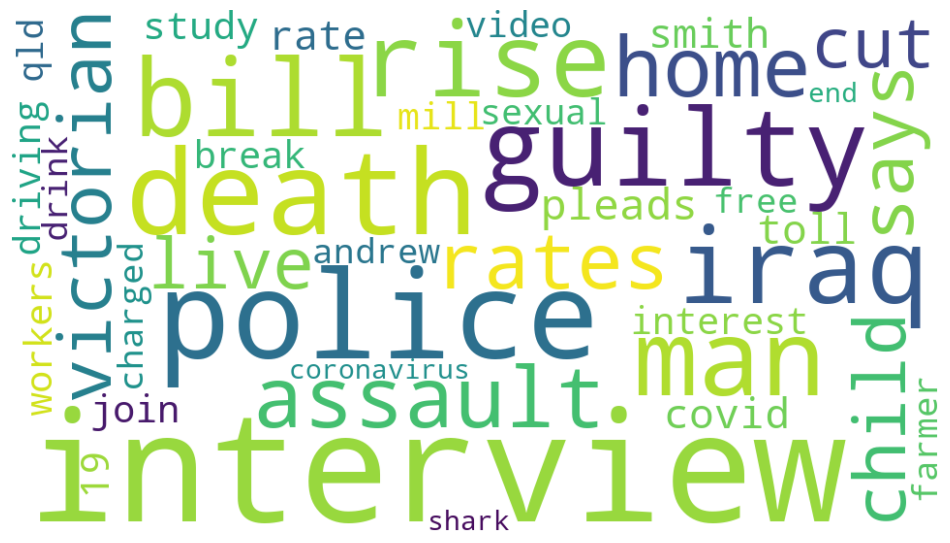

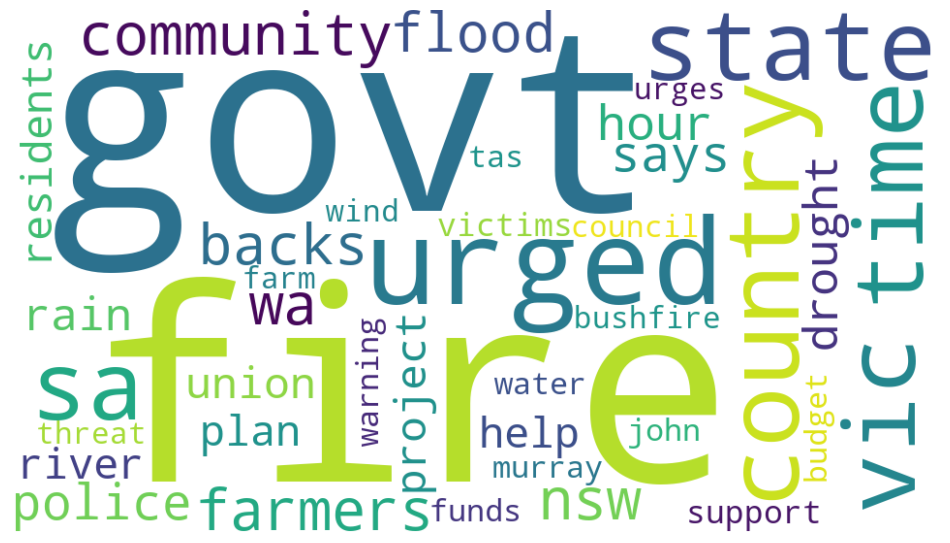

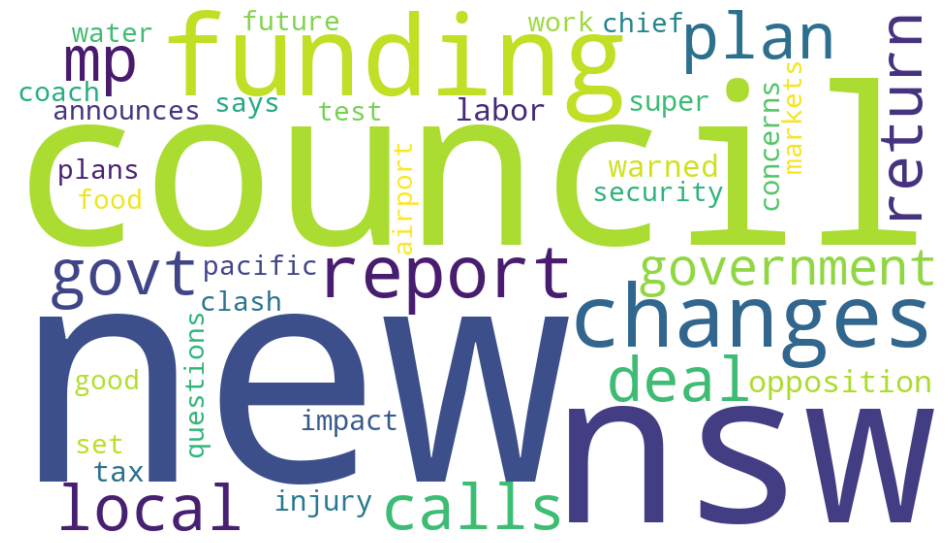

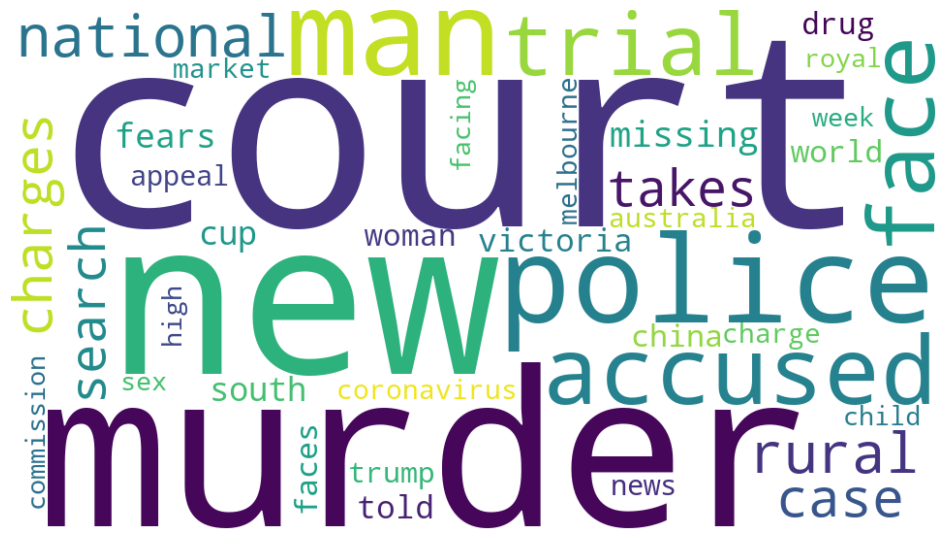

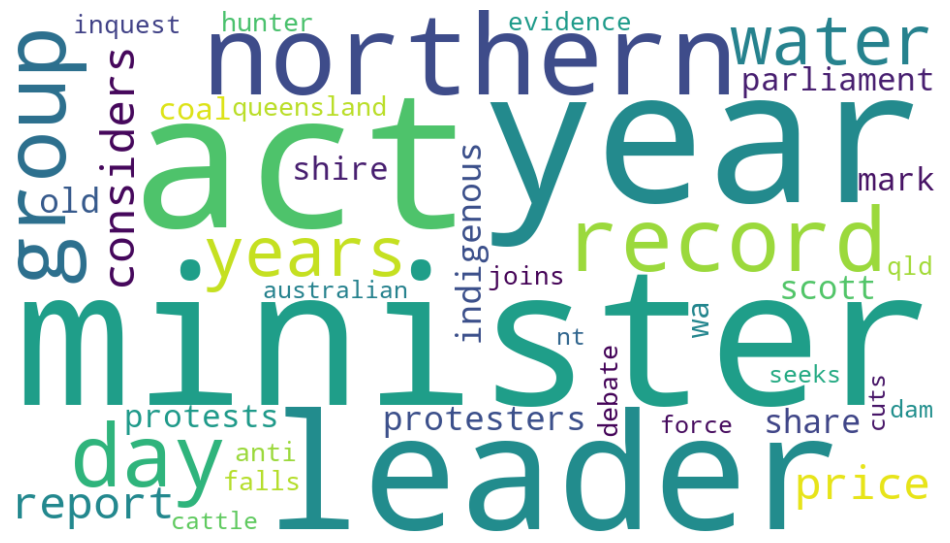

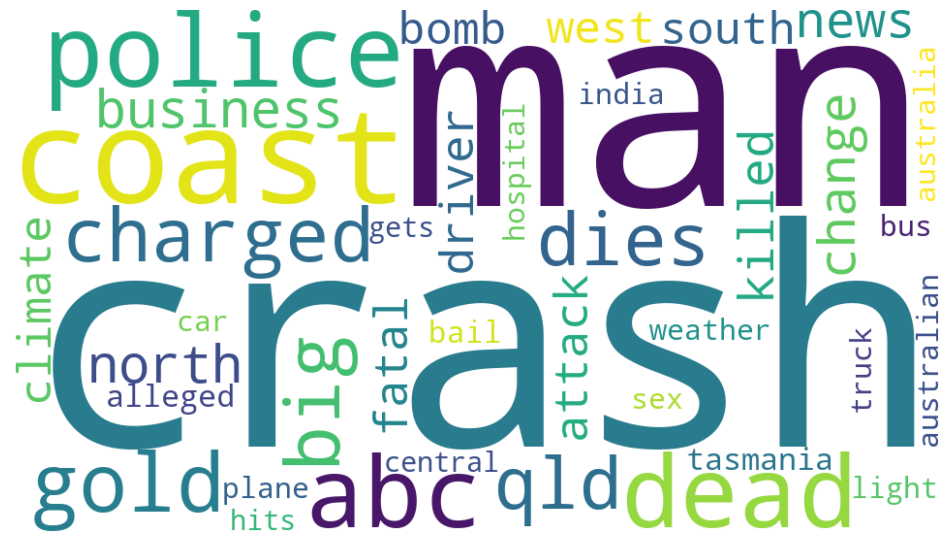

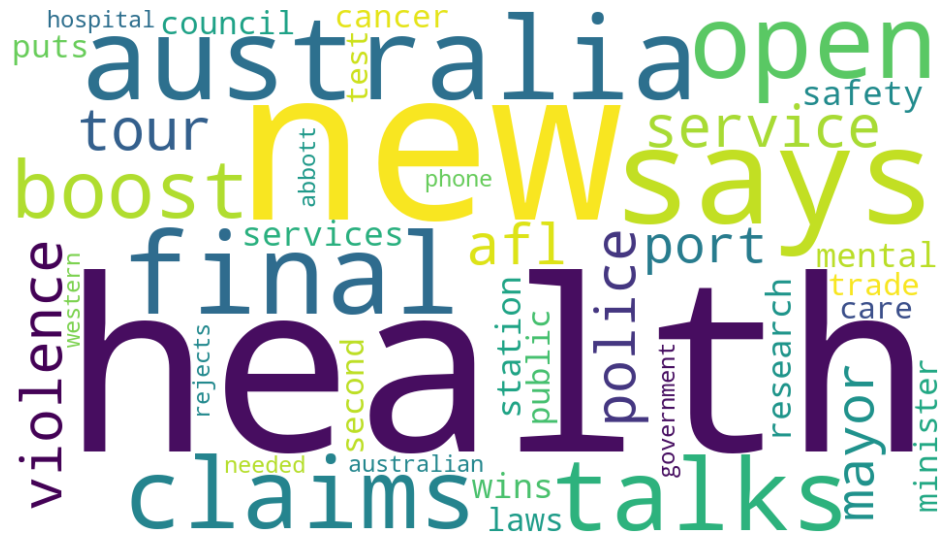

In [22]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

## Topics names by joining the top 2 words:

In [23]:
topic_names = []
voc = count_para_vectorizer.get_feature_names_out()

print("Vocabulary:", voc)

for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)

print("Topic Names:", topic_names)


Vocabulary: ['10' '100' '1000' ... 'zone' 'zones' 'zoo']
Topic Names: ['Topic interview extended', 'Topic police search', 'Topic man charged', 'Topic new laws', 'Topic rural news', 'Topic govt council', 'Topic court murder', 'Topic says government', 'Topic australia day', 'Topic crash dies']


## Separate data by year

In [24]:
from tqdm.auto import tqdm
import numpy as np

year_data = []

# Assuming paragraph_df is a DataFrame with a "year" column
for year in tqdm(np.unique(paragraph_df["publish_date"])):
    W_year = nmf_para_model.transform(tfidf_para_vectors[np.array(paragraph_df["publish_date"] == year)])
    year_data.append([year] + list(W_year.sum(axis=0) / W_year.sum() * 100.0))


C:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\ProgramData\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. P

  0%|          | 0/5873 [00:00<?, ?it/s]

C:\Users\shakkerar\AppData\Local\Temp\ipykernel_19152\2622385539.py:9: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0) / W_year.sum() * 100.0))
C:\Users\shakkerar\AppData\Local\Temp\ipykernel_19152\2622385539.py:9: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0) / W_year.sum() * 100.0))
C:\Users\shakkerar\AppData\Local\Temp\ipykernel_19152\2622385539.py:9: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0) / W_year.sum() * 100.0))
C:\Users\shakkerar\AppData\Local\Temp\ipykernel_19152\2622385539.py:9: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0) / W_year.sum() * 100.0))
C:\Users\shakkerar\AppData\Local\Temp\ipykernel_19152\2622385539.py:9: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0) / W_year.sum() * 100.0))


## Draw time chart

<Axes: xlabel='publish_date'>

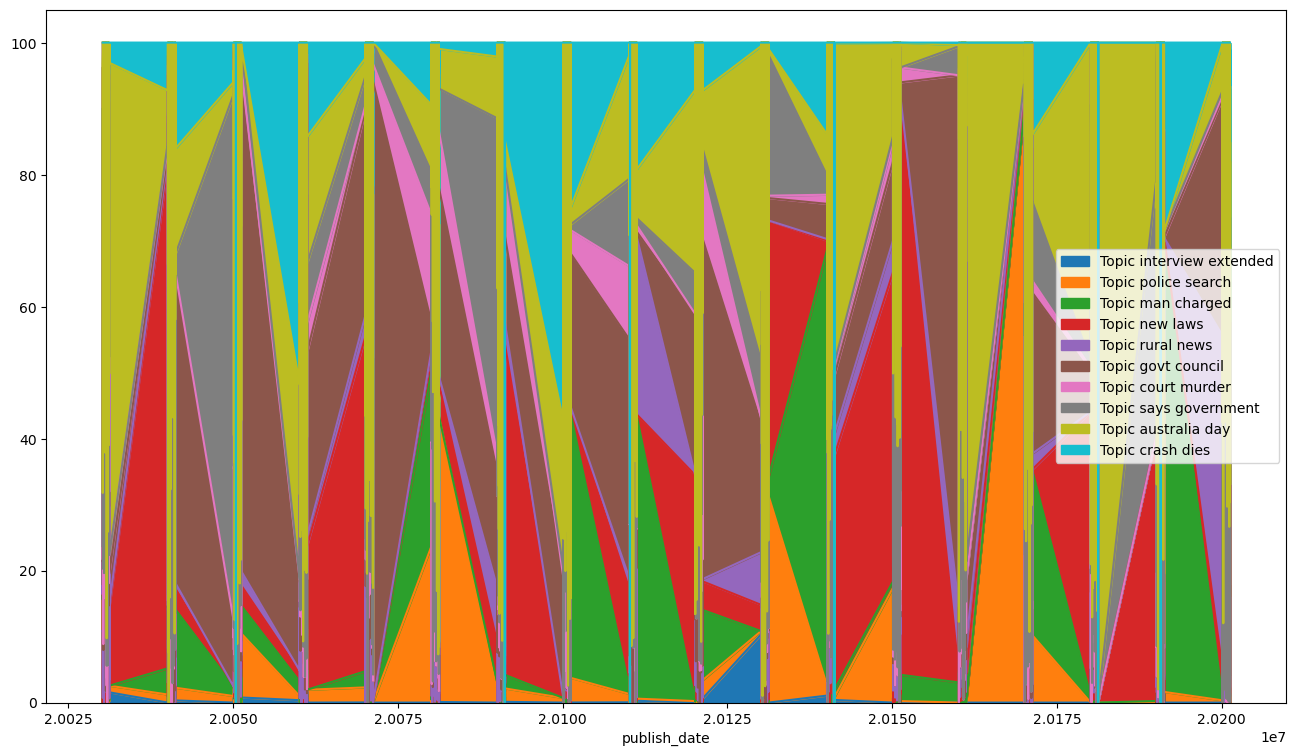

In [25]:
import matplotlib.pyplot as plt
df_year = pd.DataFrame(year_data, columns=["publish_date"] +topic_names).set_index("publish_date")
df_year.plot.area(figsize=(16,9))